In [1]:
import os
import sys
import glob
import pickle
import itertools
import random

from IPython.display import Image

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix
from sklearn.manifold import TSNE

import numpy as np
import pandas as pd


import sys
sys.path.append('../')
from src import *

random.seed(1234)
np.random.seed(1234)
%matplotlib inline

In [19]:
OUTPUT_DIR = "/home/disij/projects/sandbox/fc_mondrian/output/"
PATH_TABLE = '/home/disij/projects/acdc/data/AML_benchmark/AML_table.csv'
PATH_DATA = "/home/disij/projects/sandbox/fc_mondrian/output/AML_predictions.csv.gz"

In [3]:
# load AML data and table

### LOAD DATA ###
df = pd.read_csv( PATH_DATA, sep=',', header = 0, \
                 compression = 'gzip', engine='python')
table = pd.read_csv(PATH_TABLE, sep=',', header=0, index_col=0)
table = table.fillna(0)

### PROCESS: discard ungated events ###
X = df[df.columns[:-2]].values
table_headers = list(table)

### transform data
data = np.arcsinh((X-1.)/5.)
N, d = data.shape
emp_bounds = np.array([[data[:,d].min(), data[:,d].max()] for d in range(data.shape[1])])
ct2idx = {x:i for i,x in enumerate(table.index)}
idx2ct = {i:x for i,x in enumerate(table.index)}

Y = np.array([ct2idx[_] for _ in df.cell_type])
Y_predict = np.array([ct2idx[_] for _ in df.MP_prediction])

# rename table header 'HLA-DR' to 'HLADR' to prevent error from '-'
temp_headers = list(table)
temp_headers[29] = "HLADR"
table.columns = temp_headers

Accuracy on data: 0.919


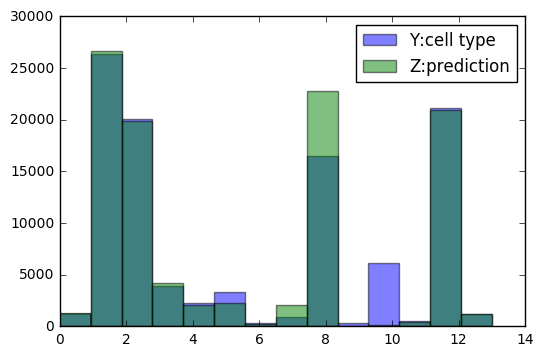

In [4]:
accuracy = sum(Y == Y_predict)*1.0/ data.shape[0]
print "Accuracy on data: %.3f" % accuracy

bins = table.shape[0]
plt.hist(Y, bins, alpha=0.5, label='Y:cell type')
plt.hist(Y_predict, bins, alpha=0.5, label='Z:prediction')
plt.legend(loc='upper right')
plt.show() 

Normalized confusion matrix


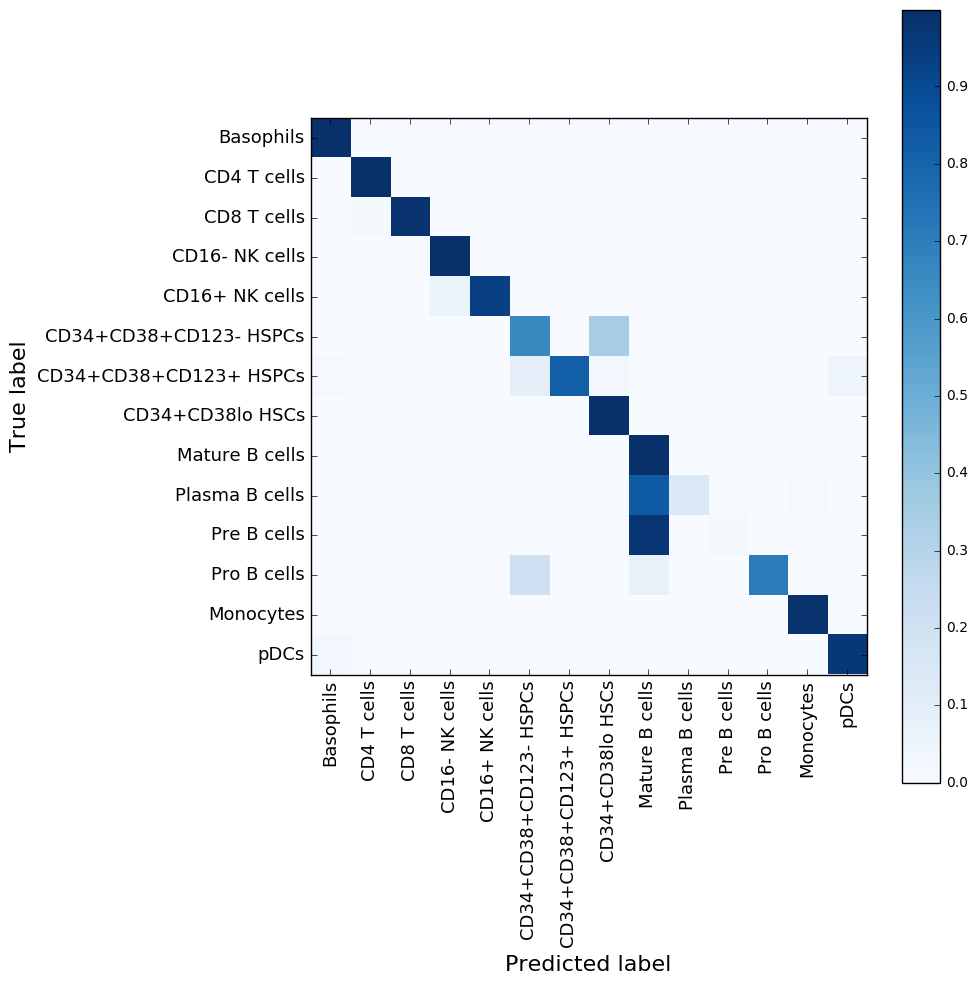

In [20]:
cnf_matrix = confusion_matrix(Y, Y_predict)
class_names = table.index

np.set_printoptions(precision=2)
plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True)
plt.savefig(OUTPUT_DIR + 'plots/AML_confusion_matrix.png', format='png',\
            dpi=2000,bbox_inches = 'tight')
plt.savefig(OUTPUT_DIR + 'plots/AML_confusion_matrix.pdf', format='pdf',\
            dpi=2000,bbox_inches = 'tight')
plt.savefig(OUTPUT_DIR + 'plots/AML_confusion_matrix.eps', format='eps',\
            dpi=2000,bbox_inches = 'tight')
plt.show()

In [6]:
%%time

idx_plot = np.random.randint(N, size=10000)
data_plot = data[idx_plot]
Y_plot = Y[idx_plot]
Y_predict_plot = Y_predict[idx_plot]

tsne = TSNE(n_components=2, random_state=1234)
Xre = tsne.fit_transform(data_plot)

CPU times: user 3min 13s, sys: 47.6 s, total: 4min
Wall time: 3min 55s


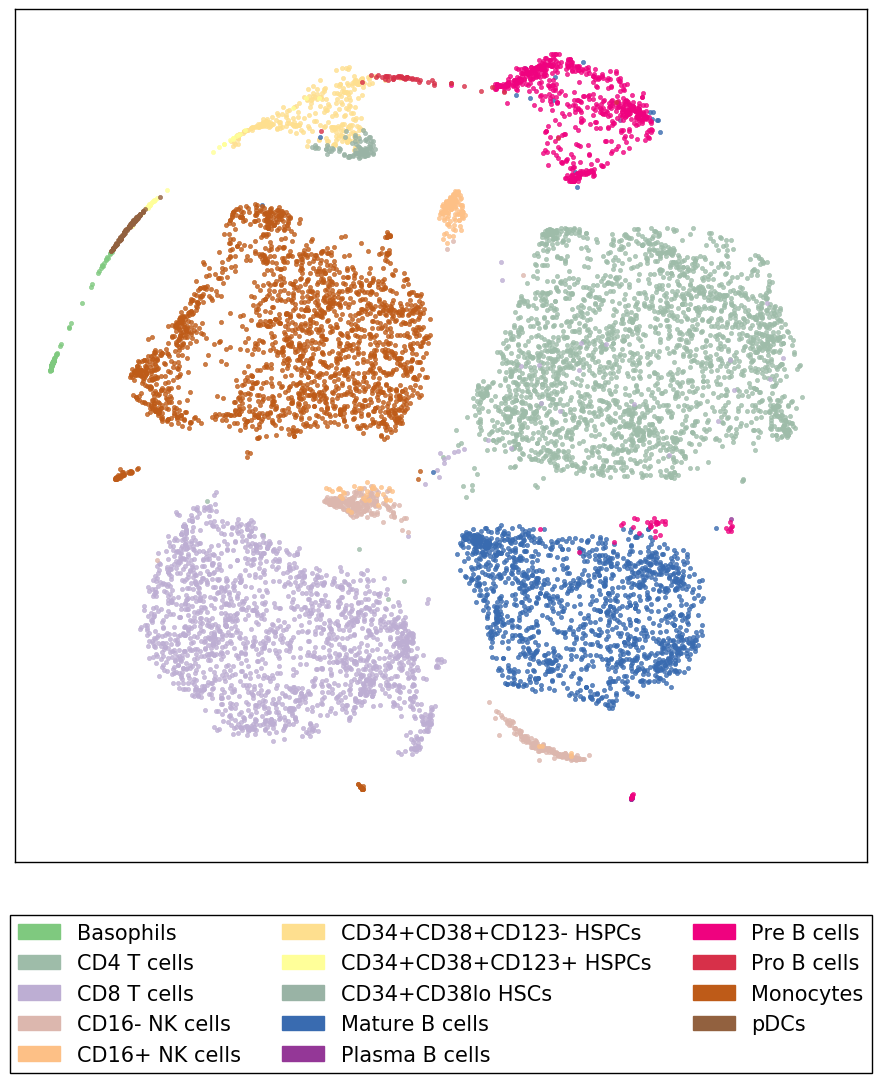

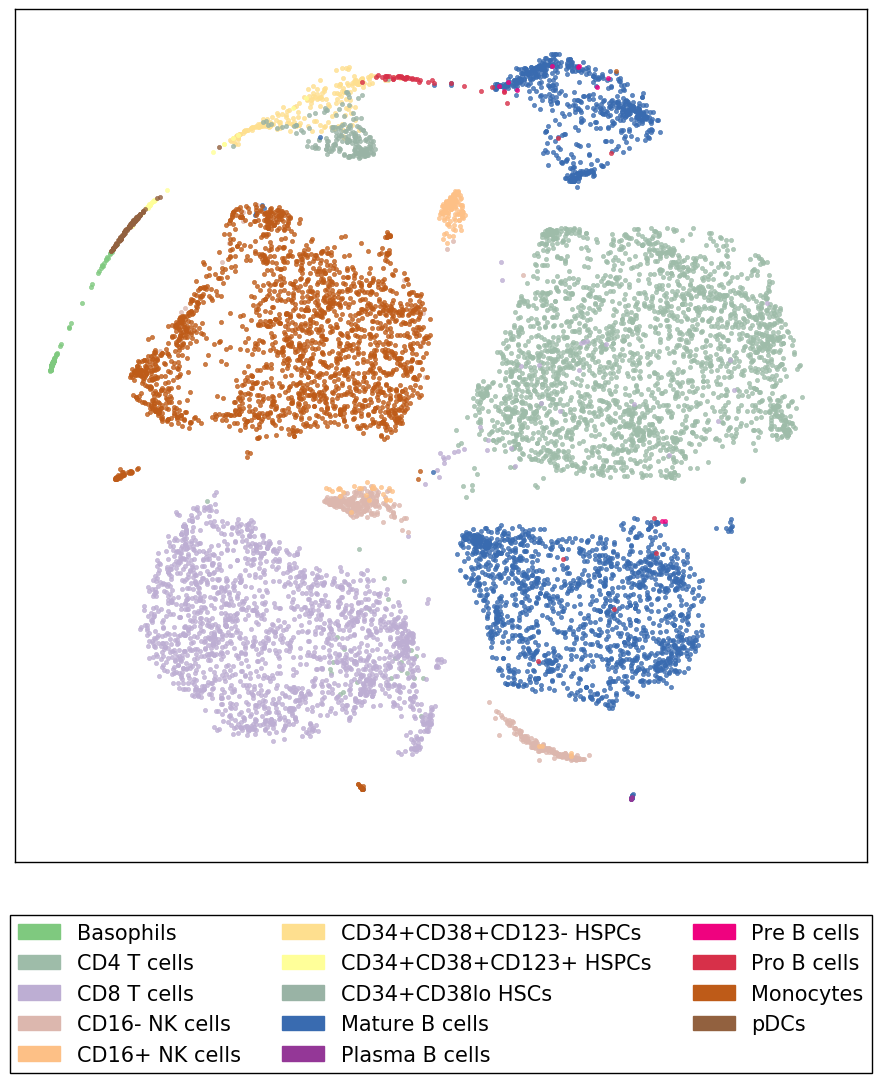

In [23]:
filename = OUTPUT_DIR + 'plots/AML_tsne_true.pdf'
plot_tsne(Xre, Y_plot, idx2ct, filename)
filename = OUTPUT_DIR + 'plots/AML_tsne_predict.pdf'
plot_tsne(Xre, Y_predict_plot, idx2ct, filename)